## General case for (x-z) Tracers Channel 

In [1]:
#e.g. Np = 6 (source, wall, wall, tracer)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pystokes

In [3]:
b = 1    # radius
Np = 4    # # particles: source, (Np-2)*wall, tracer 
eta = 1
wRbm = pystokes.wallBounded.Rbm(b, Np, eta)
ff = pystokes.forceFields.Forces(Np)

In [4]:
def tracerTraj(r, F, dt, Nt):
    'code to compute tracer velocity'
    v = np.zeros(3*Np)
    xt = np.zeros(Nt)
    yt = np.zeros(Nt)
    zt = np.zeros(Nt)
    xt[0] = r[Np   - 1] #tracer x component
    yt[0] = r[2*Np - 1] #tracer y component
    zt[0] = r[3*Np - 1] #tracer z component 

    lje, ljr, wlje, wljr = 1, 2.2, 1, .5 #lennardJones parameters 
    for i in range(Nt-1):
        ff.lennardJonesWall(F, r, lje, ljr, wlje, wljr)
        wRbm.mobilityTT(v, r, F)
        xt[i+1] = xt[i] + dt*v[Np   - 1]  #x old pos + speed*time at position 
        yt[i+1] = yt[i] + dt*v[2*Np - 1]  
        zt[i+1] = zt[i] + dt*v[3*Np - 1]  
        ## force at each time step
        r[Np  -1] = xt[i+1]
        r[2*Np  -1] = yt[i+1]
        r[3*Np -1] = zt[i+1]

        # resettting
        v = v*0
        F = F*0
        F[(2*Np):((3*Np)-1)] = f0  #z component of source and walls  
        
    return xt, yt, zt


## Tracers x-z

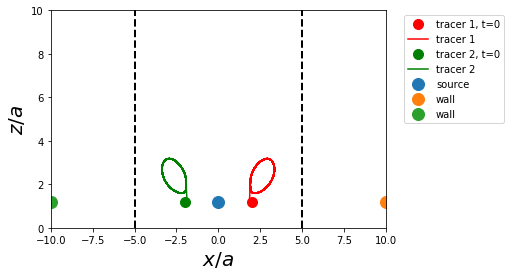

In [5]:
dt, Nt = 1, 10000
r = np.zeros(3*Np)
F = np.zeros(3*Np)
wl, h, f0 = 10, 1.2, 10

# first tracer
for i in range (1, ((Np//2))): #1,2,3
    r[i]= i*wl
    r[i+((Np-2)//2)]=-i*wl   #1+2
    
r[0]= 0 #source x 
r[Np:2*Np] = 0 #all y components zero 
r[2*Np:(3*Np)-1] = h
 
r[Np-1], r[(2*Np)-1], r[(3*Np)-1] = 2, 0, h   #modify starting position of tracer 1 

F[2*Np:((3*Np)-1)] = f0 #trap force in z 
xt1, yt1, zt1 = tracerTraj(r, F, dt, Nt)


#second tracer
for i in range (1, ((Np//2))): #1,2,3
    r[i]= i*wl
    r[i+((Np-2)//2)]=-i*wl   #1+2

r[0]= 0
r[Np:2*Np] = 0
r[2*Np:(3*Np)-1] = h

r[Np-1], r[(2*Np)-1], r[(3*Np)-1] = -2, 0, h   #modify starting position of tracer 2 

F[2*Np:((3*Np)-1)] = f0 #trap force in z
xt2, yt2, zt2 = tracerTraj(r, F, dt, Nt)

##plot
L = (((Np-2)/2)*wl)   #Np =4
yll = np.linspace(0, 10, 16)
for i in range(-((Np//2)+1),((Np//2)+2),2):  
    if i == 0:
        continue
    plt.plot(i*wl*0.5+(yll*0), yll, 'k--', lw=2)
    
plt.plot(xt1[0], zt1[0], 'ro', ms=10, label='tracer 1, t=0') 
plt.plot(xt1, zt1, 'r-', label='tracer 1')
plt.plot(xt2[0], zt2[0], 'go', ms=10, label='tracer 2, t=0')
plt.plot(xt2, zt2, 'g-', label='tracer 2')
plt.plot(r[0], r[2*Np], 'o', ms=12, label='source')
for i in range(1, (Np-1)):  
    plt.plot(r[i], r[(2*Np)+1], 'o', ms=12, label ='wall')

plt.legend(prop={'size': 8}); plt.ylim([0, 10]); plt.xlim([-L,L])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel(r'$x/a$', fontsize=20); plt.ylabel(r'$z/a$', fontsize=20);